# Predicting Calories for Fitbit Users

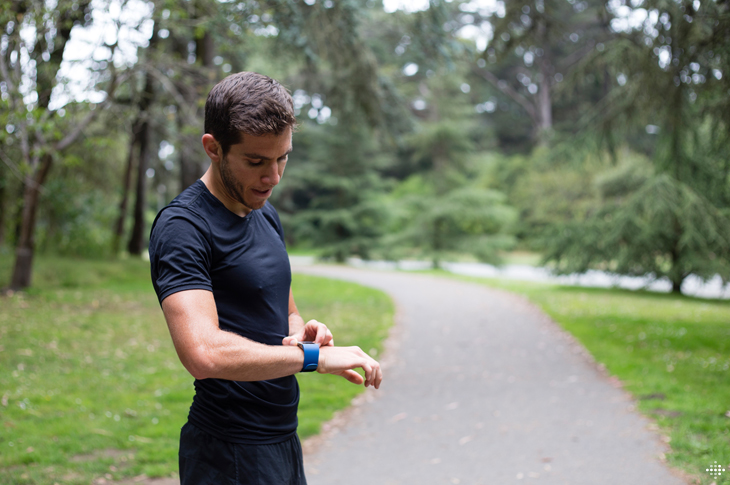

Fitbit is an activity tracker worn on the wrist just like a watch. It tracks your day-to-day activity automatically across a range of exercises like walking, running, swimming, cycling, or gym activity, and then stores this information in an easily-accessible app on your phone.

This Notebook uses Linear Regression to find out if this dataset can be used to build a ML Model that we can use to predict the amount of calories burnt based on the exercises conducted and tracked by the Fitbit used by the user (i.e., Number of Steps, Total Distance etc.)

In [2]:
from statsmodels.tsa.seasonal import seasonal_decompose

import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.inspection import permutation_importance
from sklearn.pipeline import Pipeline

from sklearn.model_selection import GridSearchCV

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
#Add panda options for column displays
#Print the long values in the columns
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.max_colwidth = 150

**OVERVIEW**

The is the capstone project which is a culmination of our time in this program and is meant to showcase our ability to develop and answer a question of interest using the tools we have encountered on this course. This project focuses on both our understanding of predictive modeling using a selection of algorithms covered in the program and our ability to communicate the findings.

#### General idea of the question that I want to ask

Fitness, Wellness and Wellbeing - Can I build ML models to predict the calories of an individual, whether a person would lose weight or not if we use features like exercise types, food intake, water consumption, supplement , dieting etc.


### Capstone CRISP-DM Overview

### Business Understanding

From a business perspective, I will be trying to identify the key drivers for the prediction question I am trying to answer, for example, for Fitness, Wellness and Wellbeing, are exercise, diet, food consumption the main drivers for weight loss.

#### Determine Business 

For the built model or ensemble of models, can we use it as a way for consumers to predict their weight loss over a period of time as opposed to the current method, where you do the following
- Enter your personal details like weight, height etc
- Enter your target/goals with regards to weight loss
- Track and log your exercise, food and water consumption
- Application displays the weight loss and progress towards your target



#### Assess Situation

Based on the limited work done to date, the main risk that I see is the lack of free quality data that could be used to create a model using the ML algorithms that we are learning on this course. As I refine my ML Question and do some data analysis, my assumptions may change or I may identify additional data sources.

The other issue may be the identification and use of infrastructure with adequate resources to run the algorithms with the data volumes required to produce a model with the right level of accuracy.

A contingency may be to use cloud computing resources which have the benefits of paying for usage but there will be a cost component to the Project.


#### Data Mining Goals

Quite simply, this will be the identification of data sets and analysis work on the data to figure out if the dataset would produce a model with the right level of accuracy.


### Data Understanding

Getting familiar with the data sets involves loading the identified dataset for the ML question, checking for missing data, correlation of the data as it relates to the the ML question, Outliers in the data sets

After considering the business understanding, we want to get familiar with our data. Write down some steps that you would take to get to know the dataset and identify any quality issues within. Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.


In [5]:
# Decribing the data that has been provided using Pandas functions
# Read daily activity log info data file into DataFrame
dailyactivity_df = pd.read_csv("../data/dailyActivity_merged.csv")

# Shape and preview
print('Fitbit users Daily Activity Log Records :',dailyactivity_df.shape)
dailyactivity_df.head()

Fitbit users Daily Activity Log Records : (940, 15)


,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [6]:
# Use Dataframe describe/view some basic statistical details like percentile, mean, std etc. of the dataset
dailyactivity_df.describe()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574
std,2.424805e+09,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.320127e+09,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000
50%,4.445115e+09,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000
75%,6.962181e+09,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000
max,8.877689e+09,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000


In [7]:
#List how many users are in this dataset
print("Number of Fitbit Users : " , dailyactivity_df.Id.value_counts().count())

Number of Fitbit Users :  33


In [7]:
# Exploring the data, lets start by describing the dataframe to get a list of provided attributes/features
dailyactivity_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

In [8]:
# Print percentage of Columns that are null in relation to the total number of columns
for column in dailyactivity_df.columns:
    if dailyactivity_df[column].isnull().sum() > 0:
        print(column, ': {:.2%}'.format(dailyactivity_df[column].isnull().sum() /
                                               dailyactivity_df[column].shape[0]))

In [9]:
#Check the number of Null Columns
dailyactivity_df.isnull().sum()

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64

There are no null features in the Dataset

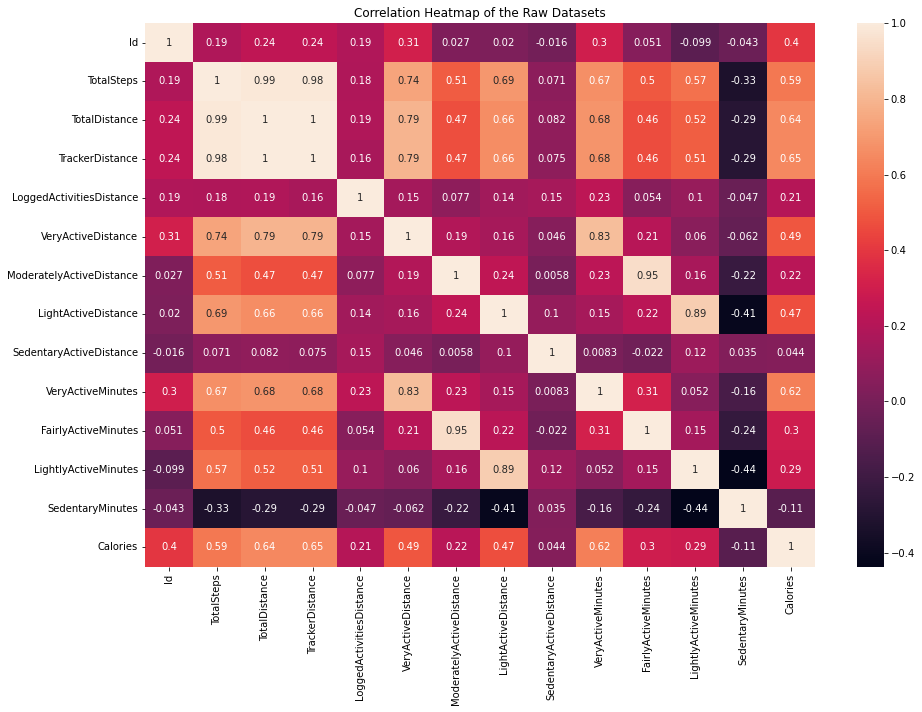

In [10]:
# Now lets look at some visualization of the selected datasets

fig, ax = plt.subplots(figsize=(15,10))
plt.rcParams["figure.autolayout"] = True

#create seaborn heatmap
ax = sns.heatmap(dailyactivity_df.corr(), annot = True)

# Adding Title to the Plot
ax.set_title("Correlation Heatmap of the Raw Datasets")
manager = plt.get_current_fig_manager()
manager.full_screen_toggle()
plt.show()

Strong correlation between Total Distance and Tracker Distance. Very Active Distance also shows a strong correlation with Total Distance and Tracker Distance features.

However, there is weak correlation across the board between the computed weight loss features and the other features.


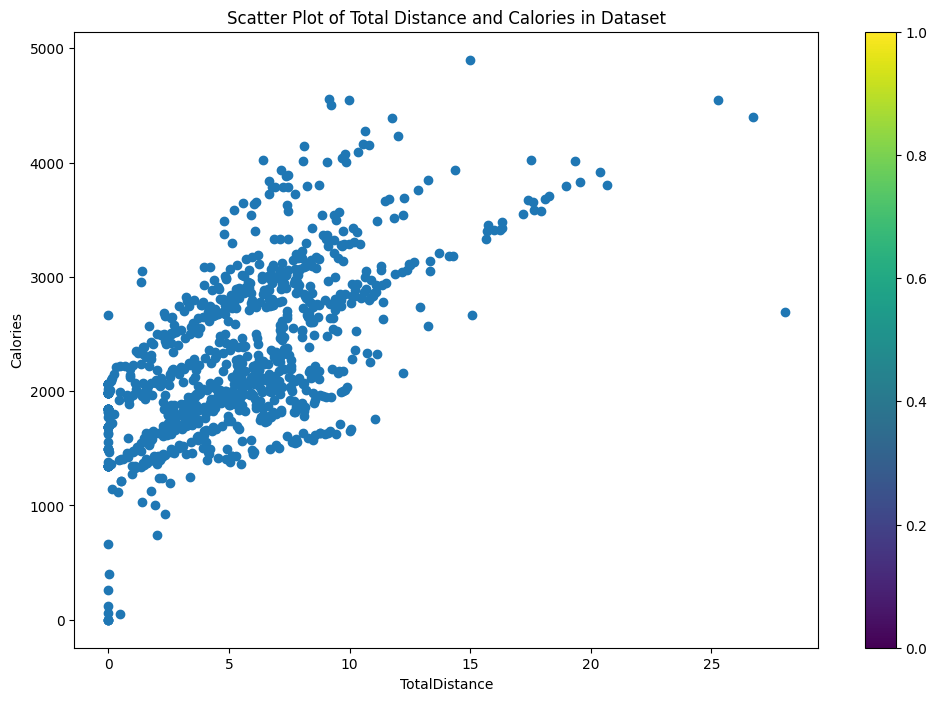

In [9]:
# Scatter plot of  Total Distance and Calories 
plt.figure(figsize=(12,8))
plt.scatter(dailyactivity_df['TotalDistance'], dailyactivity_df['Calories'])
 
# Adding Title to the Plot
plt.title("Scatter Plot of Total Distance and Calories in Dataset")
 
# Setting the X and Y labels
plt.xlabel('TotalDistance')
plt.ylabel('Calories')
plt.colorbar()
 
plt.show()

Some quick observations on the data
- Clearly there are some zero values for Total Distance and Calories which we will need to clean up (i.e., remove) in data prep
- Concentration of users with total distance between 3 to 15 miles and Calories between 1000 to 4000
- Few outliers over 20 miles but still with Calories between 1000 to 4000. Although a couple over 25 miles with Calories over 4000
- Limited records with Total Distance over 25k miles and Calories over 4000 

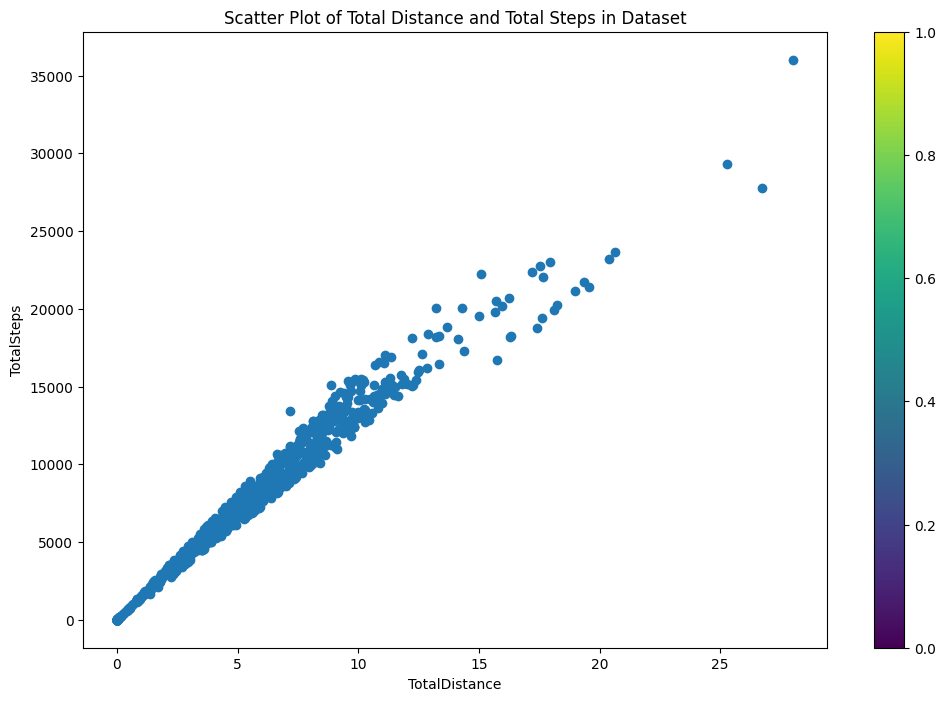

In [10]:
# Scatter plot of  Total Distance and Total Steps 
plt.figure(figsize=(12,8))
plt.scatter(dailyactivity_df['TotalDistance'], dailyactivity_df['TotalSteps'])
 
# Adding Title to the Plot
plt.title("Scatter Plot of Total Distance and Total Steps in Dataset")
 
# Setting the X and Y labels
plt.xlabel('TotalDistance')
plt.ylabel('TotalSteps')
plt.colorbar()
 
plt.show()

Strong correlation between Total Steps taken and Distance. As the TotalDistance increases, the TotalSteps also increase showing a linear relationship between the two features.

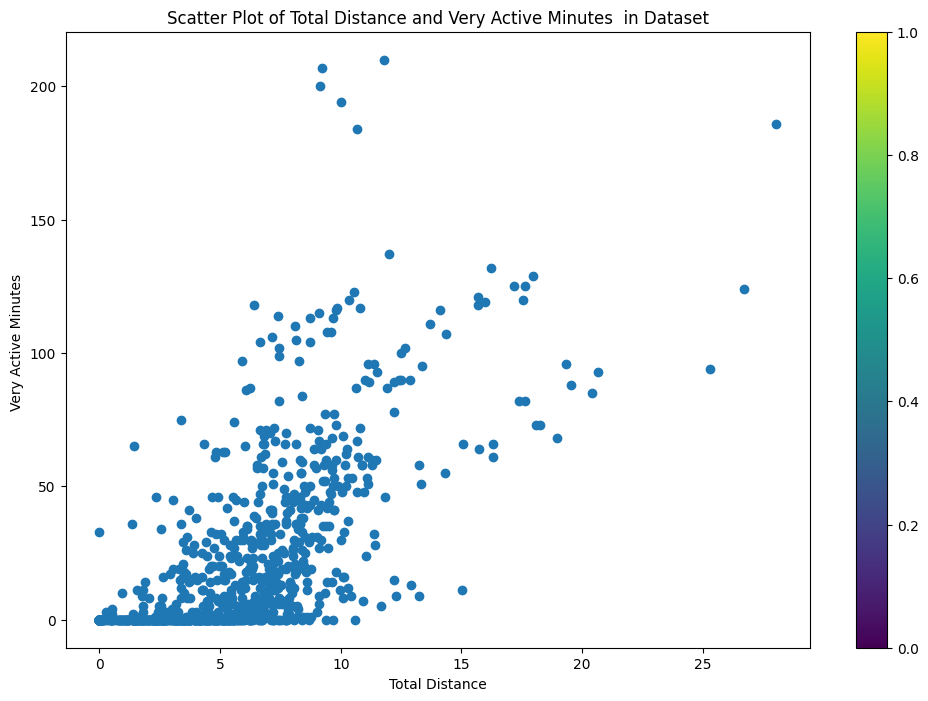

In [11]:
# Scatter plot of  Total Distance and Very Active Minutes 
plt.figure(figsize=(12,8))
plt.scatter(dailyactivity_df['TotalDistance'], dailyactivity_df['VeryActiveMinutes'])
 
# Adding Title to the Plot
plt.title("Scatter Plot of Total Distance and Very Active Minutes  in Dataset")
 
# Setting the X and Y labels
plt.xlabel('Total Distance')
plt.ylabel('Very Active Minutes ')
plt.colorbar()
 
plt.show()

Interesting observations with folks logging zero active minutes but recording values for Total Distance. Maybe Fitbit not working and bad data. These are candidates to be removed during data preparation (i.e., remove records where Very Active Minutes is zero)

We have 33 unique users in the dataset recording their activities over a number of days. Max no of days for some records is 31 days (i.e., one month)
Let's explore one user and visualize their activities over that one month period.

In [12]:
#Select a user from the dataset
dfuser1 = dailyactivity_df.query("`Id` == 1503960366")
dfuser1.head(5)


,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


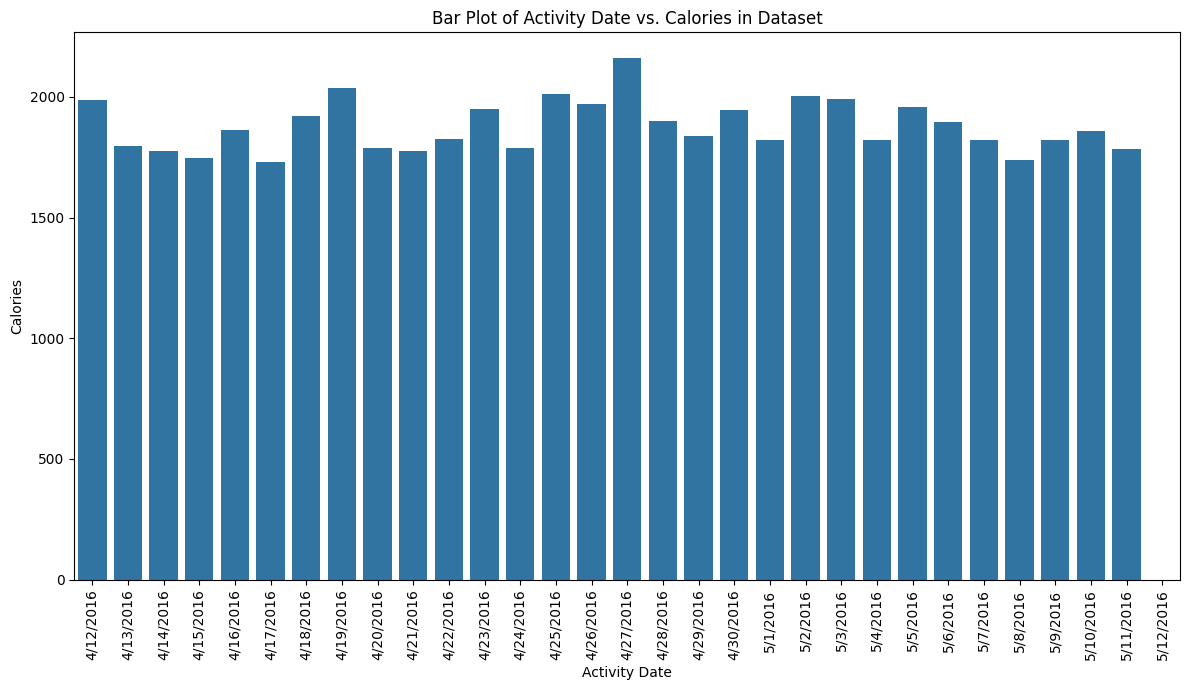

In [13]:
# Lets look at a bar plot of the Activity Date vs. Calories to see the distribution of data
plt.rcParams["figure.figsize"] = [12, 7]
plt.rcParams["figure.autolayout"] = True

ax = sns.barplot(x=dfuser1["ActivityDate"], y=dfuser1["Calories"])


# Adding Title to the Plot
ax.set_title('Bar Plot of Activity Date vs. Calories in Dataset')

# Rotating X-axis labels
plt.xticks(rotation = 90)

# Setting the X and Y labels
ax.set_xlabel('Activity Date')
ax.set_ylabel('Calories')
 
# Show the plot
plt.show()


In [14]:
dfuser1["Calories"].mean()

np.float64(1816.4193548387098)

User `1503960366` is a fairly active users over the number of days in the dataset with average of `1816` calories over the number of days above

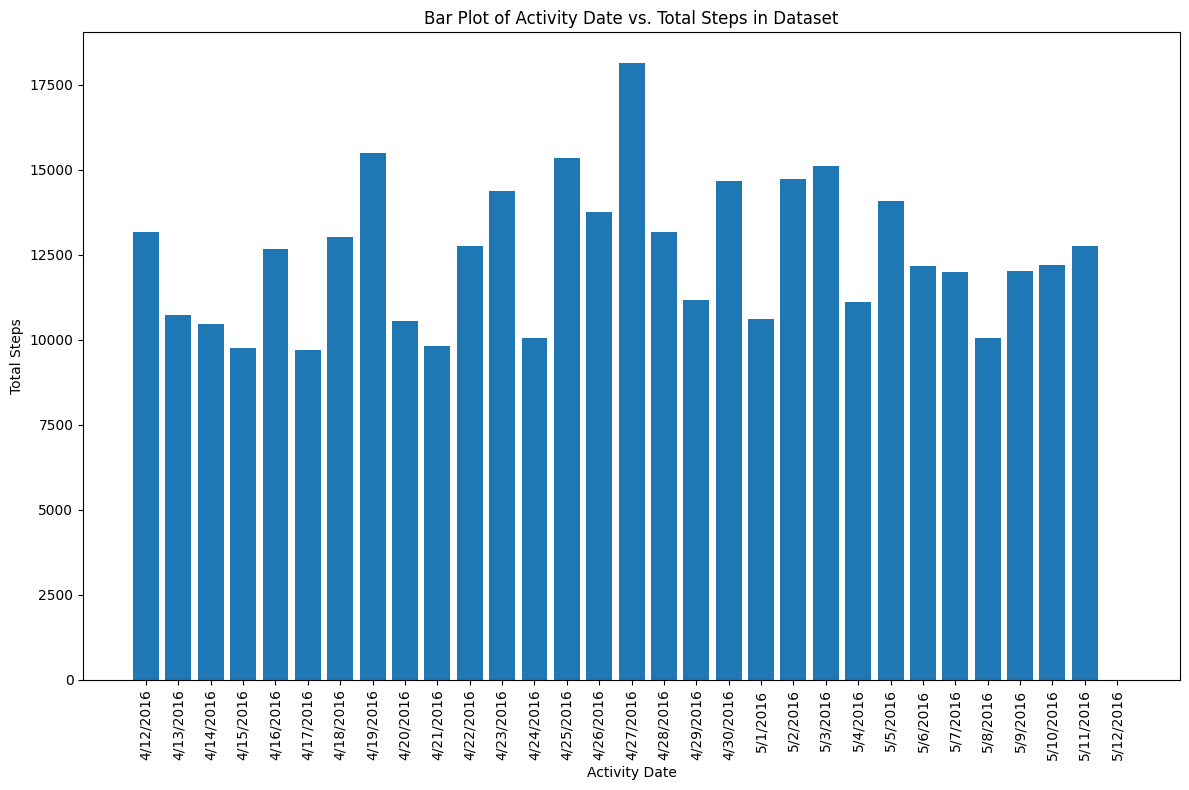

In [15]:
# Lets look at a bar plot of the Activity Date vs. Total Steps to see the distribution of data
fig, ax = plt.subplots(figsize=(12,8))
ax.bar(dfuser1["ActivityDate"],dfuser1["TotalSteps"])
# set a title and labels
ax.set_title('Bar Plot of Activity Date vs. Total Steps in Dataset')

# Rotating X-axis labels
plt.xticks(rotation = 90)

ax.set_xlabel('Activity Date')
ax.set_ylabel('Total Steps')
plt.show()

In [16]:
dfuser1["TotalSteps"].mean()

np.float64(12116.741935483871)

The average number of steps for User `1503960366` is `12,116` and supports the average Calories recorded

In [17]:
#Check which columns have zero values
#dailyactivity_df.all()
s = dailyactivity_df.eq(0).any()
s

Id                          False
ActivityDate                False
TotalSteps                   True
TotalDistance                True
TrackerDistance              True
LoggedActivitiesDistance     True
VeryActiveDistance           True
ModeratelyActiveDistance     True
LightActiveDistance          True
SedentaryActiveDistance      True
VeryActiveMinutes            True
FairlyActiveMinutes          True
LightlyActiveMinutes         True
SedentaryMinutes             True
Calories                     True
dtype: bool

All columns with the exception of ID and Activity Date have zero values. So we will be removing rows with zero values after removing the features that are not required for modeling.

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [18]:
# List the dataset - first 5 records
dailyactivity_df.head(5)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


Lets remove the following features from the Dataset - LoggedActivitiesDistance, VeryActiveDistance, ModeratelyActiveDistance,  LightActiveDistance and SedentaryActiveDistance

In [19]:
# Drop the following columns
dailyactivity_df1 = dailyactivity_df.copy().dropna()
dailyactivity_df1.drop('LoggedActivitiesDistance', axis=1, inplace=True)
dailyactivity_df1.drop('VeryActiveDistance', axis=1, inplace=True)
dailyactivity_df1.drop('ModeratelyActiveDistance', axis=1, inplace=True)
dailyactivity_df1.drop('LightActiveDistance', axis=1, inplace=True)
dailyactivity_df1.drop('SedentaryActiveDistance', axis=1, inplace=True)

dailyactivity_df1.head(5)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,36,10,221,773,1863


In [20]:
print("Number of records in Dataset :", dailyactivity_df1.shape)

Number of records in Dataset : (940, 10)


Drop rows where Calories = zero and Total Distance = zero as these records are not useful

In [21]:
#Using drop() to delete rows based on column value
dailyactivity_df1.drop(dailyactivity_df1[dailyactivity_df1['Calories'] == 0].index, inplace = True)
dailyactivity_df1.drop(dailyactivity_df1[dailyactivity_df1['TotalDistance'] == 0].index, inplace = True)

In [22]:
print("Number of records in Dataset (after removing zero calories records):", dailyactivity_df1.shape)

Number of records in Dataset (after removing zero calories records): (862, 10)


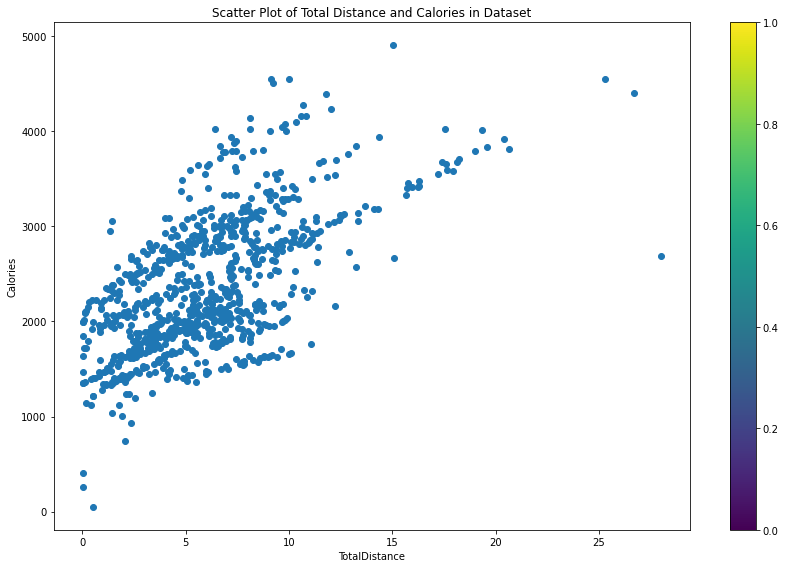

In [25]:
# Scatter plot of  Total Distance and Calories 
plt.figure(figsize=(12,8))
plt.scatter(dailyactivity_df1['TotalDistance'], dailyactivity_df1['Calories'])
 
# Adding Title to the Plot
plt.title("Scatter Plot of Total Distance and Calories in Dataset")
 
# Setting the X and Y labels
plt.xlabel('TotalDistance')
plt.ylabel('Calories')
plt.colorbar()
 
plt.show()

Zero records are removed but there are still some outliers with Total Distance close to zero and calories close to zero 

ValueError: could not convert string to float: '4/12/2016'

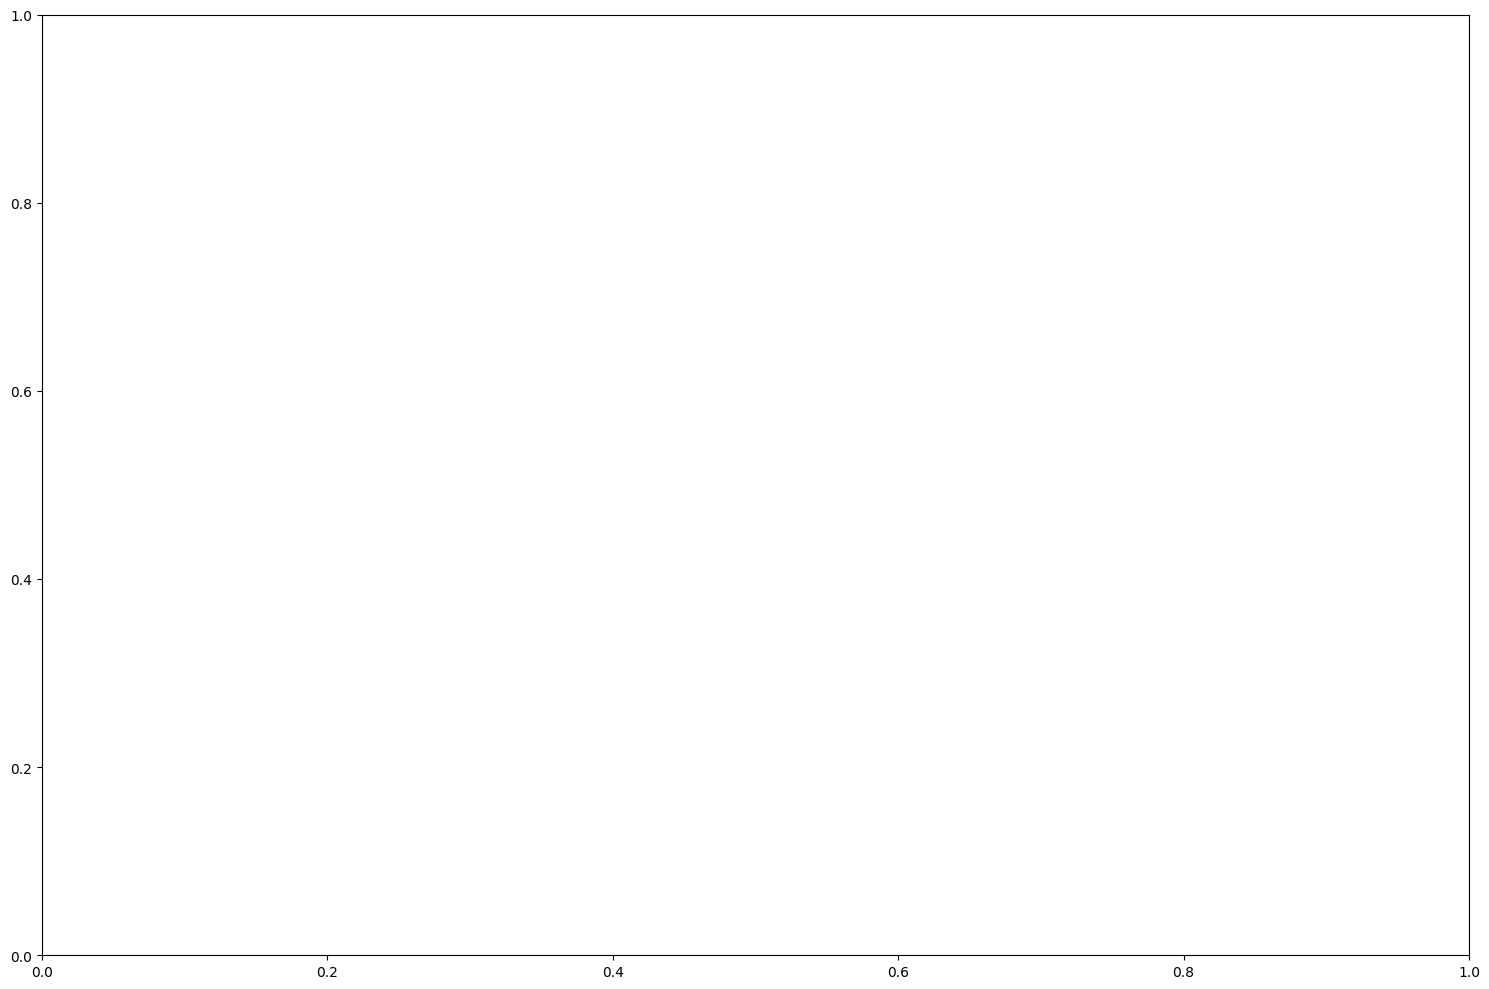

In [24]:
# Now lets look at the heatmap for the final data set

fig, ax = plt.subplots(figsize=(15,10))
plt.rcParams["figure.autolayout"] = True

#create seaborn heatmap
ax = sns.heatmap(dailyactivity_df1.corr(), annot = True)

# Adding Title to the Plot
ax.set_title("Correlation Heatmap of the manipulated Datasets")
manager = plt.get_current_fig_manager()
manager.full_screen_toggle()
plt.show()

No major difference in correlation. Dropping records with zero values has not had an effect on the correlation with other features of the dataset.

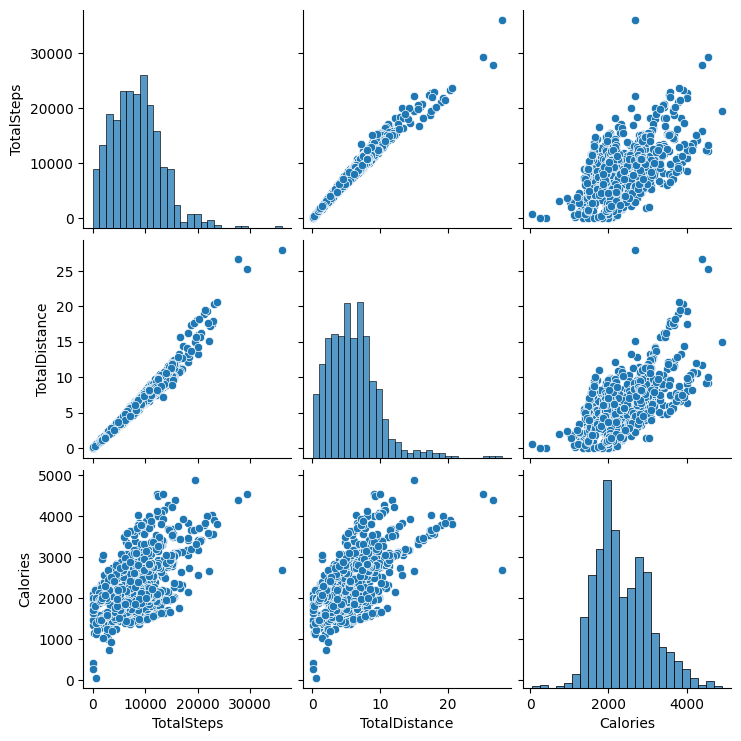

In [25]:
# Now lets look at the pairplot for the final data set of 3 key features
#plt.figure(figsize=(15,10))
#plt.title("Correlation Heatmap of the manipulated Datasets")

#create seaborn heatmap
sns.pairplot(dailyactivity_df1[['TotalSteps','TotalDistance','Calories']])

# Adding Title to the Plot
#plt.set_title("Correlation Heatmap of the manipulated Datasets")
plt.show()

TotalSteps and TotalDistance are not uniformly distributed but Calories show a some level of uniformity even though the peak values is slightly at the beginning with a uniform distribution at the end.
For TotalSteps/TotalDistance/Calories scatter plot there is a positive association between the two features.

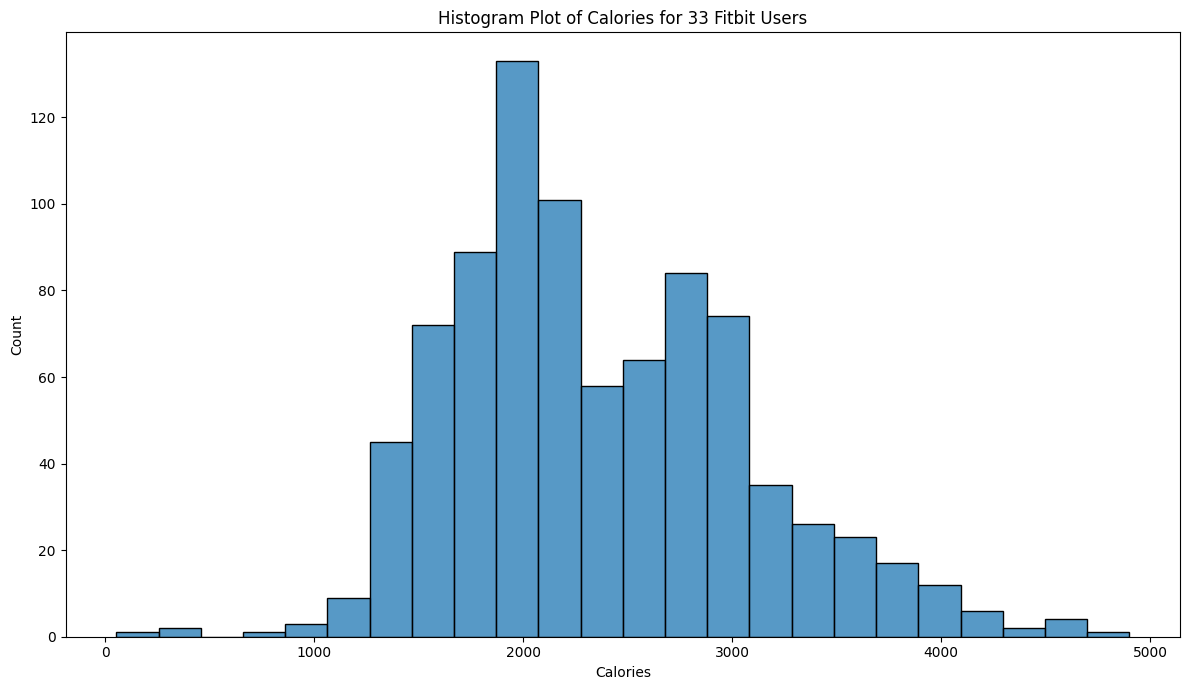

In [26]:
#Histogram plot of Calories

ax = sns.histplot(dailyactivity_df1["Calories"]).set(title='Histogram Plot of Calories for 33 Fitbit Users')
# add label to the axis and label to the plot
plt.show()


Calories show a some level of uniformity even though the peak values is slightly at the beginning with a uniform distribution at the end

### Modeling

Create a number of ML Models (i.e., ML Applications) using Linear Regression that could be used to predict Calories burnt. Use Grid Search to see if we can determine the best parameters for the dataset.

Linear regression is a statistical method that can be used to understand the relationship between two variables. It does this by fitting a straight line to the data, and then using that line to make predictions about new data. Linear regression is often used in business to predict things like sales or stock prices, but it can also be used in other areas, like science and medicine.

Linear regression is a powerful tool, but it is important to remember that it is only as good as the data that it is based on. If the data is not accurate, then the predictions made by linear regression will not be accurate either.



For the modeling, we will drop features with String data types like Id, ActivityDate as it is not needed for the modeling. 

In [27]:
# Declare the list to store Train Time, Training Accuracy and Test Accuracy
Metrics = []
Values = []


In [28]:
model_df1 = dailyactivity_df1.copy().dropna()
model_df1.drop('Id', axis=1, inplace=True)
model_df1.drop('ActivityDate', axis=1, inplace=True)
model_df1.head(10)

,TotalSteps,TotalDistance,TrackerDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,13162,8.50,8.50,25,13,328,728,1985
1,10735,6.97,6.97,21,19,217,776,1797
2,10460,6.74,6.74,30,11,181,1218,1776
3,9762,6.28,6.28,29,34,209,726,1745
4,12669,8.16,8.16,36,10,221,773,1863
5,9705,6.48,6.48,38,20,164,539,1728
6,13019,8.59,8.59,42,16,233,1149,1921
7,15506,9.88,9.88,50,31,264,775,2035
8,10544,6.68,6.68,28,12,205,818,1786
9,9819,6.34,6.34,19,8,211,838,1775


In [29]:
## Lets split the data to training and test sets, 70/30 split ratio so that we can assess how well the model 
## can predict weight loss
X = model_df1.drop(['Calories'], axis = 1)
y = model_df1.Calories
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [30]:
#First, we create a new model object
model=LinearRegression(fit_intercept=True)

In [31]:
# With model created, let's fit the model using the manipulated datasets
model.fit(X_train, y_train)

LinearRegression()

In [32]:
# Fitted model can now be used to examine the estimated coefficients and also predict ths value of the dependent
# for a given set of independent variables which in this model is the manipulated dataset
print("Model - Coefficient of the model: ",model.coef_)
print("Model - Intercept of the model: ", model.intercept_)

Model - Coefficient of the model:  [-3.08222475e-01  2.51050764e+02  1.48491316e+02  1.17601730e+01
  7.11178857e+00  2.47219223e+00  2.38705579e-01]
Model - Intercept of the model:  1426.83741765505


The intercept of a linear model is the value of the dependent variable when the independent variable is 0. For this model, the intercept is 1426.83, so when the independent variable is 0, the dependent variable will be 1426.83.

In [33]:
# get the cofficients
[(col, coef) for col, coef in zip (X_train.columns, model.coef_)]

[('TotalSteps', np.float64(-0.30822247530337693)),
 ('TotalDistance', np.float64(251.050764080107)),
 ('TrackerDistance', np.float64(148.49131582415677)),
 ('VeryActiveMinutes', np.float64(11.760172954239167)),
 ('FairlyActiveMinutes', np.float64(7.111788566858266)),
 ('LightlyActiveMinutes', np.float64(2.4721922338500804)),
 ('SedentaryMinutes', np.float64(0.23870557881022592))]

In [34]:
#Let compute the predictions for the entire set of inputs
train_predictions=model.predict(X_train)
train_predictions

array([2654.26197103, 2232.30542935, 3176.23914569, 2360.41991408,
       3520.97932403, 2691.57810125, 2533.48836756, 1906.11982033,
       2380.03902409, 2307.20552961, 2557.60578406, 1469.06808548,
       2434.22221632, 2381.26308261, 1875.91594175, 1693.68589823,
       3003.41035503, 1989.39739067, 2179.54712395, 2616.27601531,
       1952.30384139, 2400.21065296, 2199.29709444, 2479.08498661,
       2061.00417272, 2012.37767603, 2120.02146603, 2212.74195708,
       2268.69631394, 1918.77295247, 2529.97391564, 2671.98912672,
       1771.71443508, 2097.12312925, 1949.5115895 , 1869.25647478,
       1614.94818399, 2014.51676435, 1940.42045837, 2421.12851579,
       1858.80646731, 2107.7567375 , 2911.63747482, 3060.3054713 ,
       2715.48906199, 2935.13156199, 2241.43322928, 3946.75129727,
       1928.49866027, 1436.24451591, 1859.49942474, 2101.40766296,
       2970.06160171, 2194.47188472, 2643.03112942, 3609.01738156,
       2788.19701666, 2164.26140659, 4389.47887356, 3034.08389

In [35]:
# Calculate the $R^2$ score
r2 = r2_score(y_train, train_predictions)

print('The Training $R^2$ Score is:', r2)
Metrics.append('Model - Training $R^2$ Score')
Values.append(r2)


The Training $R^2$ Score is: 0.6230668549691001


In [36]:
# Compute Accuracy and RMSE to training model
score = model.score(X_train, y_train)
print("Training Accuracy: ", score)
print("Training RMSE:     ",np.sqrt(mean_squared_error(y_train,train_predictions)))
print('Training MAE: ', mean_absolute_error(y_train, train_predictions))

#Store values for Results Comparison
Metrics.append('Model - Training Accuracy')
Values.append(score)
Metrics.append('Model - Training RMSE')
Values.append(np.sqrt(mean_squared_error(y_train,train_predictions)))
Metrics.append('Model - Training MAE')
Values.append(mean_absolute_error(y_train, train_predictions))

Training Accuracy:  0.6230668549691001
Training RMSE:      446.2633779514835
Training MAE:  360.8285690029978


The Training scores of 0.62 indicates that the model is moderately accurate. The model is able to explain 62% of the variation in the data, which is a moderate percentage. This means that the model is doing a fairly good job of capturing the relationship between the independent and dependent variables.

However the RMSE of 446.26 and Mean Absolute Error of 360.82 indicates that the model is not very accurate. The model is making predictions that are, on average, 446.26 units or 360.82 units away from the actual values. This is a fairly large error, and indicates that there is room for improvement in the model.

##### Model evaluation/ Making Predictions

In [37]:
# Using the model to make predictions of Price on the test set:
test_predictions=model.predict(X_test)

In [38]:
# Calculate the $R^2$ score
test_r2 = r2_score(y_test,test_predictions)

print('The Testing $R^2$ Score is:', test_r2)
Metrics.append('Model - Testing $R^2$ Score')
Values.append(test_r2)


The Testing $R^2$ Score is: 0.5407183358738665


In [39]:
# Compute Accuracy and RMSE to test model
test_score = model.score(X_test, y_test)
print("Testing Accuracy: ", test_score )
print("Testing RMSE:     ",np.sqrt(mean_squared_error(y_test,test_predictions) ))
print('Testing Mean Absolute Error: ', mean_absolute_error(y_test, test_predictions))

#Store values for Results Comparison
Metrics.append('Model - Testing Accuracy')
Values.append(test_score)
Metrics.append('Model - Testing RMSE')
Values.append(np.sqrt(mean_squared_error(y_test,test_predictions) ))
Metrics.append('Model - Testing MAE')
Values.append(mean_absolute_error(y_test, test_predictions))


Testing Accuracy:  0.5407183358738665
Testing RMSE:      432.2176846254647
Testing Mean Absolute Error:  354.7263405741707


The Testing scores of 0.54 indicates that the model is moderately accurate. The model is able to explain 54% of the variation in the data, which is a moderate percentage.

For the test datasets, the RMSE of 432.21 and Mean Absolute Error of 354.72 indicates that the model is not very accurate. The model is making predictions that are, on average, 432.21 units or 354.72 units away from the actual values. This is a fairly large error, and indicates that there is room for improvement in the model.

In [40]:
#First Test Data for Active Athlectic user with the following
#TotalSteps,TotalDistance,TrackerDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes

#First Example, fitbit user with 10k steps and 5 miles distance
print("Results - Model Testing")
fitbit_user_10k_steps = [[10000,5,5,9,7,150,250]]
print("Fitbit user walking 10k steps should record Calories lost: ", model.predict(fitbit_user_10k_steps))

#Second Example, fitbit user with 15k steps and 10 miles distance
fitbit_user_15k_steps = [[15000,10.0,10.0,15,13,300,700]]
print("Fitbit user walking 15k steps should record Calories lost: ", model.predict(fitbit_user_15k_steps))

#Third Example, fitbit user with 30k steps and 15 miles distance
fitbit_user_30k_steps = [[30000,15.0,15.0,50,36,790,980]]
print("FitBit User walking 30k steps should record Calories lost: ", model.predict(fitbit_user_30k_steps))



Results - Model Testing
Fitbit user walking 10k steps should record Calories lost:  [928.45237048]
Fitbit user walking 15k steps should record Calories lost:  [1976.52850815]
FitBit User walking 30k steps should record Calories lost:  [1204.29072521]


Text(0.5, 1.0, 'Linear Regression Results - Total Distance against Calories - Model')

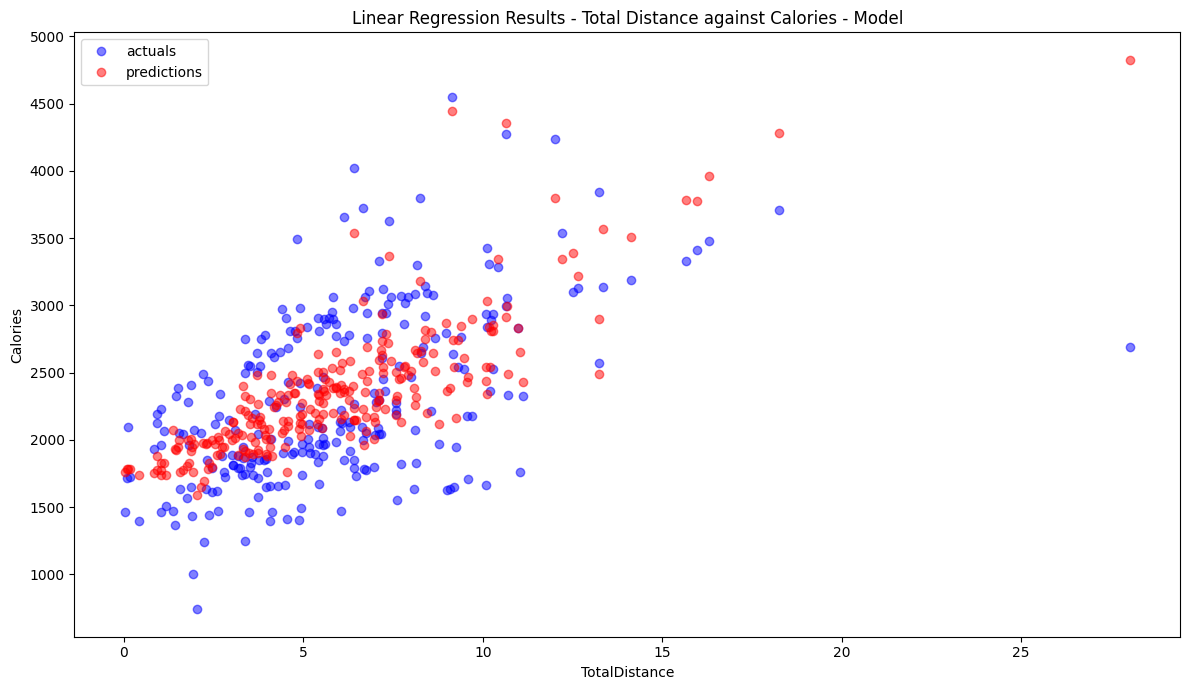

In [41]:
# Visualization of how well the model did by plotting the actual and predicted values
fig, axes = plt.subplots(1, 1, figsize =(12, 7))
axes.plot (X_test.TotalDistance, y_test, 'ob', label ='actuals', alpha=0.5)
axes.plot (X_test.TotalDistance, test_predictions, 'or', label ='predictions', alpha=0.5)
axes.set(xlabel='TotalDistance', ylabel='Calories')
axes.legend()
axes.set_title('Linear Regression Results - Total Distance against Calories - Model')


Fair distribution of predictions for Calories vs actual values for Total Distance. Increase in total distance predicted/correlated to a higher number in Calories lost

In [42]:
# Check the correlation to see if the model tracks the relationship between independent and dependent features
np.corrcoef(y_test, test_predictions) [0][1]

np.float64(0.7382535526222133)

The correlation coefficient is a measure of linear dependence between two variables.As you can see, the correlation coefficients are all very high, indicating that there is a strong linear relationship between all pairs of elements in the array.

### Model Results

In [43]:
# Display results in a Dataframe for 1st model where all features are used to build the model
dict = {'Metric':Metrics, 'Value': Values}
results_comp_df = pd.DataFrame(dict)
results_comp_df

,Metric,Value
0,Model - Training $R^2$ Score,0.623067
1,Model - Training Accuracy,0.623067
2,Model - Training RMSE,446.263378
3,Model - Training MAE,360.828569
4,Model - Testing $R^2$ Score,0.540718
5,Model - Testing Accuracy,0.540718
6,Model - Testing RMSE,432.217685
7,Model - Testing MAE,354.726341


An accuracy testing score of 0.54 means that the model was able to correctly classify 54% of the data. The Mean Absolute Error (MAE) of 354.72 means that the model's predictions were, on average, 354.72 units away from the actual values. This is a fairly large error, and indicates that there is room for improvement in the model.

Together, these results indicate that the model is not very accurate, and that there is a lot of room for improvement.

In [44]:
# Lets try scaling the data before fitting to see if this would improve the accuracy of the model
# Define the pipeline for scaling and model fitting
pipeline = Pipeline([
    ("MinMax", MinMaxScaler()),
    ("LINGR", LinearRegression(fit_intercept=True))
])

# Scale the data and fit the model
model_pipe = pipeline.fit(X_train, y_train)


#Let compute the predictions for the entire set of inputs
train_pipe=model_pipe.predict(X_train)

# Calculate the $R^2$ score
r2 = r2_score(y_train, train_pipe)

print('Scaled Training $R^2$ Score is:', r2)
print("Scaled Training Accuracy: ", model_pipe.score(X_train, y_train))
print("Scaled Training RMSE:     ",np.sqrt(mean_squared_error(y_train,train_pipe)))

# Evaluate the model
Y_pred = model_pipe.predict(X_test)
print('Scaled Testing Mean Absolute Error: ', mean_absolute_error(Y_pred, y_test))
print('Sclaed Testing Score', model_pipe.score(X_test, y_test))



Scaled Training $R^2$ Score is: 0.6230668549691001
Scaled Training Accuracy:  0.6230668549691001
Scaled Training RMSE:      446.26337795148345
Scaled Testing Mean Absolute Error:  354.72634057417037
Sclaed Testing Score 0.5407183358738659


Scaling the data to make it more consistent and easier for machine learning algorithms did not provide different metrics compared to the results for non scaled data.

#### Lets run the Regression Model using a selected number of features only
``Model1`` will be created using TotalSteps	and TotalDistance in the final dataset

In [45]:
# Declare the list to store Train Time, Training Accuracy and Test Accuracy
Metrics1 = []
Values1 = []

In [46]:
# Run Regression using TotalSteps and TotalDistance features of dataset
X1 = model_df1[['TotalSteps', 'TotalDistance']]
y1 = model_df1.Calories
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.3, random_state = 0)
model1=LinearRegression(fit_intercept=True)
model1.fit(X1_train, y1_train)
print("Model1 - Coefficient of the model: ",model1.coef_)
print("Model1 - Intercept of the model: ", model1.intercept_)

Model1 - Coefficient of the model:  [-1.91694910e-01  3.61712176e+02]
Model1 - Intercept of the model:  1803.3548088655677


In [47]:
# get the cofficients
[(col, coef) for col, coef in zip (X1_train.columns, model1.coef_)]

[('TotalSteps', np.float64(-0.19169491008330178)),
 ('TotalDistance', np.float64(361.71217635584554))]

In [48]:
#Let compute the predictions for the entire set of inputs
train1_predictions=model1.predict(X1_train)
train1_predictions

array([2078.96915053, 2088.39446859, 3073.40338975, 2259.76426252,
       2962.43367881, 2295.73493832, 2326.81451249, 2246.25611466,
       2227.32121979, 2422.95750205, 2675.31949339, 1841.20649412,
       2239.15791778, 2473.35175607, 2223.38169847, 1812.53824863,
       2474.83528835, 1955.55341451, 2291.94044164, 2640.90565943,
       2030.08688113, 2691.43252912, 2178.98903638, 2373.82283916,
       2318.62186865, 1988.1111137 , 2112.79160831, 2402.32615028,
       2297.20039563, 2068.05685721, 2314.20561698, 2352.17561197,
       1801.02938834, 2088.19015441, 2070.43958512, 1948.30484242,
       1973.00298297, 1967.31129053, 1909.86732291, 2618.72631606,
       1910.47643441, 2037.67228854, 3134.18878074, 2673.10152455,
       2835.69268681, 3036.36525954, 2192.36471152, 3688.83739164,
       1911.09629543, 1806.15498769, 2082.92132066, 2039.13059288,
       2522.85746712, 2196.87581788, 2710.83133305, 3548.8730474 ,
       2635.14606703, 1970.45723105, 4743.15208227, 2974.13409

In [49]:
# Calculate the $R^2$ score
r2 = r2_score(y1_train, train1_predictions)

print('The Training $R^2$ Score is:', r2)
Metrics1.append('Model1 - Training $R^2$ Score')
Values1.append(r2)


The Training $R^2$ Score is: 0.4857933203731576


In [50]:
#Compute Accuracy and RMSE to training model
score1 = model1.score(X1_train, y1_train)
print("Training Accuracy: ", round(score1*100, 2))
print("Training RMSE:     ",round(np.sqrt(mean_squared_error(y1_train,train1_predictions)), 2))
print('Training MAE: ', mean_absolute_error(y1_train, train1_predictions))

#Store values for Results Comparison
Metrics1.append('Model1 - Training Accuracy')
Values1.append(score1)
Metrics1.append('Model1 - Training RMSE')
Values1.append(np.sqrt(mean_squared_error(y1_train,train1_predictions)))
Metrics1.append('Model1 - Training MAE')
Values1.append(mean_absolute_error(y1_train, train1_predictions))

Training Accuracy:  48.58
Training RMSE:      521.23
Training MAE:  406.4714498768927


In [51]:
# Using the model to make predictions of Price on the test set:
test1_predictions=model1.predict(X1_test)

In [52]:
# Calculate the $R^2$ score
test1_r2 = r2_score(y1_test,test1_predictions)

print('The Testing $R^2$ Score is:', test1_r2)
Metrics1.append('Model1 - Testing $R^2$ Score')
Values1.append(test1_r2)


The Testing $R^2$ Score is: 0.4100348860021228


In [53]:
# Compute Accuracy and RMSE to test model
score1_t = model1.score(X1_test, y1_test)
print("Testing Accuracy: ", round(score1_t*100, 2))
print("Testing RMSE:     ",round(np.sqrt(mean_squared_error(y1_test,test1_predictions)), 2))
print('Testing Mean Absolute Error: ', mean_absolute_error(y1_test, test1_predictions))

#Store values for Results Comparison
Metrics1.append('Model1 - Testing Accuracy')
Values1.append(score1_t)
Metrics1.append('Model1 - Testing RMSE')
Values1.append(np.sqrt(mean_squared_error(y1_test,test1_predictions) ))
Metrics1.append('Model1 - Testing MAE')
Values1.append(mean_absolute_error(y1_test, test1_predictions))

Testing Accuracy:  41.0
Testing RMSE:      489.86
Testing Mean Absolute Error:  384.4620941557719


Text(0.5, 1.0, 'Linear Regression Results - Total Distance against Calories - Model1')

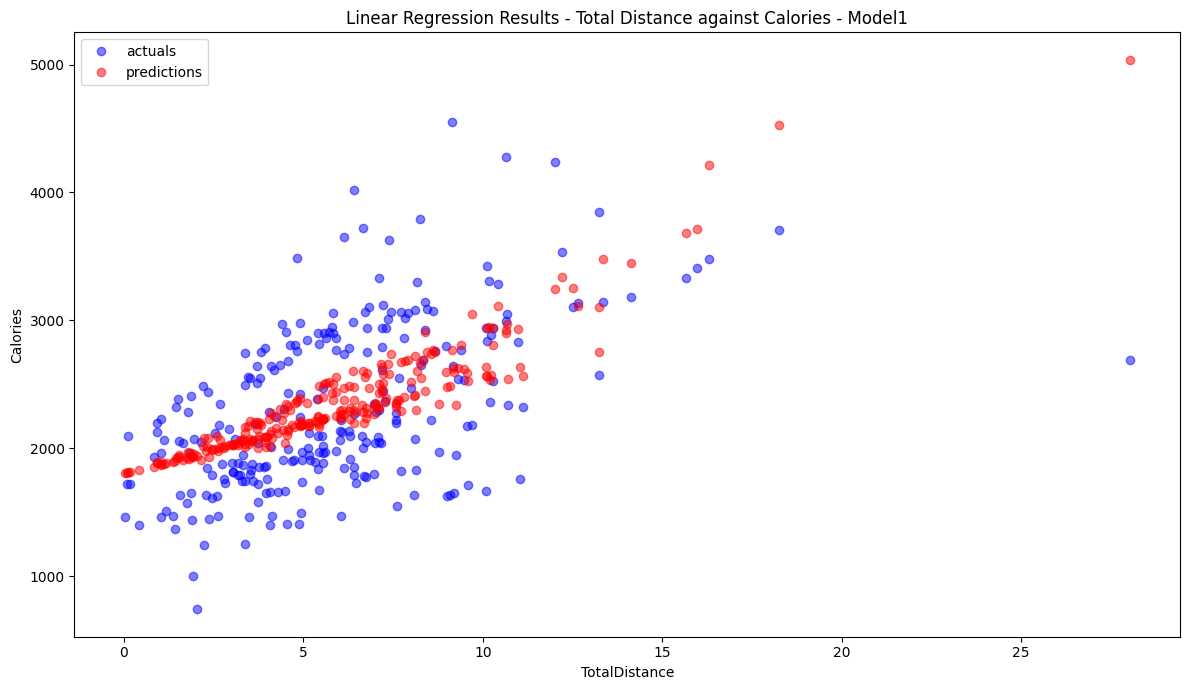

In [54]:
# Visualization of how well the model did by plotting the actual and predicted values
fig, axes = plt.subplots(1, 1, figsize =(12, 7))
axes.plot (X1_test.TotalDistance, y1_test, 'ob', label ='actuals', alpha=0.5)
axes.plot (X1_test.TotalDistance, test1_predictions, 'or', label ='predictions', alpha=0.5)
axes.set(xlabel='TotalDistance', ylabel='Calories')
axes.legend()
axes.set_title('Linear Regression Results - Total Distance against Calories - Model1')


The linear regression model results produce a model that can be used for Calories Prediction. Let's evaluate using this model using some test sample with TotalSteps and TotalDistance


In [55]:
#Prediction using all input values as parameters

#First Example, fitbit user with 10k steps and 5 miles distance
print("Results - Model 1 Testing")
fitbit_user_10k_steps = [[10000,5.0]]
print("Fitbit user walking 10k steps should record Calories lost: ", model1.predict(fitbit_user_10k_steps))
    
#Second Example, fitbit user with 15k steps and 10 miles distance
fitbit_user_15k_steps = [[15000,10.0]]
print("Fitbit user walking 15k steps should record Calories lost: ", model1.predict(fitbit_user_15k_steps))

#Third Example, fitbit user with 30k steps and 15 miles distance
fitbit_user_30k_steps = [[30000,15.0]]
print("Fitbit user walking 30k steps should record Calories lost: ", model1.predict(fitbit_user_30k_steps))


Results - Model 1 Testing
Fitbit user walking 10k steps should record Calories lost:  [1694.96658981]
Fitbit user walking 15k steps should record Calories lost:  [2545.05292117]
Fitbit user walking 30k steps should record Calories lost:  [1478.1901517]


Predicted results from this model is good for 10k and 15k, but not accurate for 30k, you would expect that the more steps and distance that you walk should result in higher calories, but the inverse is the case looking at the test results above for 30k.

### Model1 Results

In [56]:
# Display results in a Dataframe for 2nd model where TotalSteps and TotalDistance features of dataset
dict.clear()
Metrics1
dict = {'Metric':Metrics1, 'Value': Values1}
results_comp_df1 = pd.DataFrame(dict)
results_comp_df1

,Metric,Value
0,Model1 - Training $R^2$ Score,0.485793
1,Model1 - Training Accuracy,0.485793
2,Model1 - Training RMSE,521.228244
3,Model1 - Training MAE,406.471450
4,Model1 - Testing $R^2$ Score,0.410035
5,Model1 - Testing Accuracy,0.410035
6,Model1 - Testing RMSE,489.864699
7,Model1 - Testing MAE,384.462094


### Using Cross-validation a technique in machine learning to improve the accuracy of a model. It is a way of estimating the performance of a model on unseen data.

In [57]:
# Linear Regression with cross validation

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics


X2 = model_df1[['TotalSteps', 'TotalDistance']]
y2 = model_df1.Calories
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.3, random_state = 0)

print(X2_train.shape, y2_train.shape)
print(X2_test.shape, y2_test.shape)    #It's good practice to check

lm = LinearRegression()

#Next we do cross validation, which splits apart our training data and fits the model on different samples and 
# gives scores for each sample to get the best fit model before we test it on the testing data.
#cv is the number of folds, scores will give an array of scores

scores = cross_val_score(lm, X2_train, y2_train, cv = 10)   
print (scores, np.mean(scores), np.std(scores))

#To get predictions (y_hat) and check them all in one using cross validation
#y_test is needed here in predictions to get scores for each fold of cv

predictions = cross_val_predict(lm, X2_test, y2_test, cv = 10)   

#this says the accuracy of the predictions from the best cv fold
accuracy = metrics.r2_score(y2_test, predictions)  

#If this is good, continue to fit the model on the data

lm.fit(X2_train, y2_train)

#Predictions from model
y_hat = lm.predict(X2_test)

#Model performance

print("Model Performance: ", lm.score(X2_test, y2_test) )    


(603, 2) (603,)
(259, 2) (259,)
[0.4909035  0.35652127 0.38094793 0.38219451 0.52867172 0.49026077
 0.54167294 0.34698932 0.47805486 0.55703707] 0.45532538854676874 0.07652636937423093
Model Performance:  0.4100348860021228


In [58]:
#Prediction using all input values as parameters

#First Example, fitbit user with 10k steps and 8 miles distance
fitbit_user_10k_steps = [[10000,8.0]]
print("Fitbit user walking 10k steps should record Calories lost: ", lm.predict(fitbit_user_10k_steps))
    
#Second Example, fitbit user with 15k steps and 9.88 miles distance
fitbit_user_15k_steps = [[15000,9.88]]
print("Fitbit user walking 15k steps should record Calories lost: ", lm.predict(fitbit_user_15k_steps))

#Third Example, fitbit user with 30k steps and 15 miles distance
fitbit_user_30k_steps = [[30000,15.0]]
print("Fitbit user walking 30k steps should record Calories lost: ", lm.predict(fitbit_user_30k_steps))


Fitbit user walking 10k steps should record Calories lost:  [2780.10311888]
Fitbit user walking 15k steps should record Calories lost:  [2501.64746001]
Fitbit user walking 30k steps should record Calories lost:  [1478.1901517]


Running cross validation on the dataset did not provide results/metrics better than the two models above and the Predicted results from testing the model does not look realistic.

In [60]:
# Let's try running Grid Search on the dataset to see which parameters will product the best score

parameters = {
    'fit_intercept': [True, False],
    'positive': [True, False]
}

# Note that 'normalize' is deprecated in newer versions of scikit-learn
# if you are using a Pipeline with StandardScaler or similar, remove 'normalize'

# Create GridSearchCV object with cv set to an integer (e.g., 5 for 5-fold cross-validation)
grid = GridSearchCV(model, parameters, cv=5)

# Fit the grid
grid.fit(X_train, y_train)
#
# Print the training score of the best model
#
print('\n Linear Regression - Grid Search best score -')
print(grid.best_score_)

print('\nGrid Search best parameters -')
print(grid.best_params_)

print('\Grid Search CV Results -')
print(grid.cv_results_)

#
# Print the test score of the best model
#
clfLR = grid.best_estimator_
print('Test Accuracy Score for Best Estimator: %.3f' % clfLR.score(X_test, y_test))

print("Best cross-validation score:", grid.best_score_)

score = grid.score(X_test, y_test)
print("Test Score :", score)



 Linear Regression - Grid Search best score -
0.5831387894345645

Grid Search best parameters -
{'fit_intercept': True, 'positive': False}
\Grid Search CV Results -
{'mean_fit_time': array([0.00194864, 0.00150547, 0.00087352, 0.0009408 ]), 'std_fit_time': array([0.00065556, 0.00082072, 0.00010333, 0.00032024]), 'mean_score_time': array([0.00096755, 0.00076962, 0.00061207, 0.00061197]), 'std_score_time': array([2.11639401e-04, 2.28263845e-04, 5.66671160e-05, 1.45043282e-04]), 'param_fit_intercept': masked_array(data=[True, True, False, False],
             mask=[False, False, False, False],
       fill_value=True), 'param_positive': masked_array(data=[True, False, True, False],
             mask=[False, False, False, False],
       fill_value=True), 'params': [{'fit_intercept': True, 'positive': True}, {'fit_intercept': True, 'positive': False}, {'fit_intercept': False, 'positive': True}, {'fit_intercept': False, 'positive': False}], 'split0_test_score': array([0.43276093, 0.58051782, 

#### Results from Grid Search Cross Validation - Linear Regression

Linear Regression - Grid Search best score - 0.583138789434568

Best parameters - {'copy_X': True, 'fit_intercept': True, 'normalize': False, 'positive': False} \
Test Accuracy Score for Best Estimator: 0.541 \
Best cross-validation score: 0.583138789434568 \
Test Score : 0.5407183358738697

Using cross validation on linear regression improved the accuracy to 58% with best parameters listed above

### Hyperparameter tuning on Multiple Models – Regression

Let's look at how different regressors will perform on this dataset. Main reason why we are executing so many models together is to find which machine learning model works best for this particular dataset.


In [61]:
from time import time

from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import explained_variance_score

from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.compose import ColumnTransformer,  TransformedTargetRegressor
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline

In [62]:
#Now create a list of these models
regressors = [
    KNeighborsRegressor(),
    GradientBoostingRegressor(),
    ExtraTreesRegressor(),
    RandomForestRegressor(),
    DecisionTreeRegressor(),
    LinearRegression(),
    Lasso(),
    Ridge()
]

In [63]:
#Define the list of variable to create the dataframe
ModelName = []
TrainTime = []
PredictTime = []
TrainAcc = []
TestAcc = []
MseList = []
MaeList = []

In [64]:
# Run the different models and print results
head = 10

for model_list in regressors[:head]:
    start = time()
    model_list.fit(X_train, y_train)
    train_time = time() - start
    start = time()
    y_pred = model_list.predict(X_test)
    predict_time = time()-start    
    print(model_list)
    
    # Extract the model name from the string
    model_name_str = model_list.__class__.__name__
    # Print the model name
    print(model_name_str)

    
    print("\tTraining time: %0.3fs" % train_time)
    print("\tPrediction time: %0.3fs" % predict_time)
    print("\tTraining Accuracy score:",  model_list.score(X_train, y_train))
    print("\tTesting Accuracy score:", r2_score(y_test, y_pred))
    print("\tExplained variance:", explained_variance_score(y_test, y_pred))
    print("\tMean absolute error:", mean_absolute_error(y_test, y_pred))
    print("\tR2 score:", r2_score(y_test, y_pred))
    print()
    
       #Append the values to build the dataframe
    ModelName.append(model_name_str)
    TrainTime.append(train_time)
    PredictTime.append(predict_time)
    TrainAcc.append(model_list.score(X_train, y_train))
    TestAcc.append(r2_score(y_test, y_pred))
    MseList.append(mean_squared_error(y_test, y_pred))
    MaeList.append(mean_absolute_error(y_test, y_pred))
    

KNeighborsRegressor()
KNeighborsRegressor
	Training time: 0.003s
	Prediction time: 0.003s
	Training Accuracy score: 0.5610956406632952
	Testing Accuracy score: 0.13282234782437186
	Explained variance: 0.14096186424651058
	Mean absolute error: 479.0818532818533
	R2 score: 0.13282234782437186

GradientBoostingRegressor()
GradientBoostingRegressor
	Training time: 0.126s
	Prediction time: 0.002s
	Training Accuracy score: 0.8635779358303747
	Testing Accuracy score: 0.6194005939204965
	Explained variance: 0.6203670554526579
	Mean absolute error: 306.9136883950077
	R2 score: 0.6194005939204965

ExtraTreesRegressor()
ExtraTreesRegressor
	Training time: 0.150s
	Prediction time: 0.007s
	Training Accuracy score: 1.0
	Testing Accuracy score: 0.7112844880289663
	Explained variance: 0.7123425035271529
	Mean absolute error: 257.1528185328185
	R2 score: 0.7112844880289663

RandomForestRegressor()
RandomForestRegressor
	Training time: 0.304s
	Prediction time: 0.009s
	Training Accuracy score: 0.95611312

### Results - Hyperparameter tuning on Multiple Models – Regression

In [65]:
# Display results in a Dataframe for Hyperparameter tuning on Multiple Models – Regression
dict = {'Model':ModelName, 'Training Accuracy': TrainAcc, 'Test Accuracy': TestAcc, 
        'Mean Square Error': MseList, 'Mean Absolute Error': MaeList}
results_df = pd.DataFrame(dict)
results_df

,Model,Training Accuracy,Test Accuracy,Mean Square Error,Mean Absolute Error
0,KNeighborsRegressor,0.561096,0.132822,352723.207259,479.081853
1,GradientBoostingRegressor,0.863578,0.619401,154808.236647,306.913688
2,ExtraTreesRegressor,1.000000,0.711284,117434.600756,257.152819
3,RandomForestRegressor,0.956113,0.668757,134732.610099,282.918031
4,DecisionTreeRegressor,1.000000,0.360403,260154.976834,349.694981
5,LinearRegression,0.623067,0.540718,186812.126903,354.726341
6,Lasso,0.622987,0.539699,187226.712733,355.016034
7,Ridge,0.623064,0.540556,186878.003486,354.904863


The training and prediction times for all regressors was similar, on the Training Score, ExtraTreesRegressor and DecisionTreeRegressor had the best score of 100%. DecisionTreeRegressor testing score is at 38%. Recommended model from this modeling would be GradientBoostingRegressor or RandomForestRegressor with training scores over 85% and test scores over 60%


### Ensemble Techniques  – Multiple Regressors

As the score for Linear Regression has not gone above 65% for the modeling above, let's look at ensemble techniques because we can't change the data that we have and these techniques should help change a weakish predictor into a stronger predictor.

Let's look at how different regressors (same as above) will perform on this dataset with scaling. Main reason why we are executing so many models together is to find which machine learning model works best for this particular dataset.

In [66]:
regressors1 = [
    Pipeline([('scale', MinMaxScaler()),
              ('model', TransformedTargetRegressor())
        ]),
    Pipeline([('scale', MinMaxScaler()),
              ('model', KNeighborsRegressor())
        ]),
    Pipeline([('scale', MinMaxScaler()),
              ('model', DecisionTreeRegressor())
        ]),
    Pipeline([('scale', MinMaxScaler()),
              ('model', Ridge())
        ]),
    Pipeline([('scale', MinMaxScaler()),
              ('model', SVR())
        ]),
    Pipeline([('scale', MinMaxScaler()),
              ('model', GradientBoostingRegressor())
        ]),
    Pipeline([('scale', MinMaxScaler()),
              ('model', RandomForestRegressor())
        ])    
]


In [67]:
#Define the list of variable to create the dataframe
ModelName1 = []
TrainTime1 = []
PredictTime1 = []
TrainAcc1 = []
TestAcc1 = []
MseList1 = []
MaeList1 = []

In [68]:
from time import time
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, r2_score

Models = []
# Run the different models and print results
head = 0
     
for regressor1 in regressors1:
    start = time()
    regressor1.fit(X_train, y_train)
    train_time = time() - start
    start = time()
    y_pred = regressor1.predict(X_test)
    predict_time = time()-start    
    print(regressor1)

    # Extract the model name from the string
    model_name = regressors1[head].steps[1][1].__class__.__name__
    model_class = regressors1[head].steps[1][1]
    # Print the model name
    print(model_name)
    print(model_class)
      
    print("\tTraining time: %0.3fs" % train_time)
    print("\tPrediction time: %0.3fs" % predict_time)
    print("\tTraining Accuracy score:",  regressor1.score(X_train, y_train))
    print("\tTesting Accuracy score:", r2_score(y_test, y_pred))
    print("\tMean absolute error:", mean_absolute_error(y_test, y_pred))
    print("\tMean squared error:", mean_squared_error(y_test, y_pred))
    print()
    
    head = head + 1
    
    #Append the values to build the dataframe
    ModelName1.append(model_name)
    TrainTime1.append(train_time)
    PredictTime1.append(predict_time)
    TrainAcc1.append(regressor1.score(X_train, y_train))
    TestAcc1.append(r2_score(y_test, y_pred))
    MseList1.append(mean_squared_error(y_test, y_pred))
    MaeList1.append(mean_absolute_error(y_test, y_pred))
    
    #Set models for Voting Regressor
    Models.append((model_name,model_class))

    

Pipeline(steps=[('scale', MinMaxScaler()),
                ('model', TransformedTargetRegressor())])
TransformedTargetRegressor
TransformedTargetRegressor()
	Training time: 0.004s
	Prediction time: 0.001s
	Training Accuracy score: 0.6230668549691001
	Testing Accuracy score: 0.5407183358738659
	Mean absolute error: 354.72634057417037
	Mean squared error: 186812.12690299787

Pipeline(steps=[('scale', MinMaxScaler()), ('model', KNeighborsRegressor())])
KNeighborsRegressor
KNeighborsRegressor()
	Training time: 0.004s
	Prediction time: 0.002s
	Training Accuracy score: 0.7485560732873975
	Testing Accuracy score: 0.5688306654691484
	Mean absolute error: 320.88262548262543
	Mean squared error: 175377.47907335905

Pipeline(steps=[('scale', MinMaxScaler()), ('model', DecisionTreeRegressor())])
DecisionTreeRegressor
DecisionTreeRegressor()
	Training time: 0.005s
	Prediction time: 0.001s
	Training Accuracy score: 1.0
	Testing Accuracy score: 0.352749781388766
	Mean absolute error: 352.169884169884

### Results Ensemble Techniques  – Multiple Regressors

In [69]:
# Display results in a Dataframe fro Ensemble Techniques – Multiple Regressors
dict = {'Model':ModelName1, 'Training Accuracy': TrainAcc1, 'Test Accuracy': TestAcc1, 
        'Mean Square Error': MseList1, 'Mean Absolute Error': MaeList1}
results_df1 = pd.DataFrame(dict)
results_df1


,Model,Training Accuracy,Test Accuracy,Mean Square Error,Mean Absolute Error
0,TransformedTargetRegressor,0.623067,0.540718,186812.126903,354.726341
1,KNeighborsRegressor,0.748556,0.568831,175377.479073,320.882625
2,DecisionTreeRegressor,1.000000,0.352750,263268.054054,352.169884
3,Ridge,0.546841,0.372198,255357.429452,420.482447
4,SVR,0.009347,0.029354,394808.606357,506.508955
5,GradientBoostingRegressor,0.863578,0.621662,153888.414716,306.829712
6,RandomForestRegressor,0.956414,0.672434,133237.073907,279.816448


Looking at the training and test accuracy, even though DecisionTreeRegressor had a score of 100%, the test accuracy is 37% which means this model can accurately predict the class of 37% of the test data. This will will affect the performance of the model in the real world.

For model recommendation in this ensemble, it will either GradientBoostingRegressor	or RandomForestRegressor with over 85% in training score and over 60% in test scores.


In [70]:
from sklearn.ensemble import VotingRegressor

# Use Voting Regressor to determine the accuracy
vote_regressor1 = VotingRegressor([('transR', TransformedTargetRegressor()), ('knn',KNeighborsRegressor()), 
                                  ('dct',DecisionTreeRegressor()), ('rid',Ridge()), ('svr', SVR()),
                                   ('gbr',GradientBoostingRegressor()), ('rfr',RandomForestRegressor())])
vote_pipeline1 = Pipeline([
    ('scale', MinMaxScaler()),
    ('voter',vote_regressor1)
])
vote_pipeline1.fit(X_train, y_train)
vote_accuracy = vote_pipeline1.score(X_train, y_train)
y_pred_vote = vote_pipeline1.predict(X_test)

print("Training Accuracy score:", vote_accuracy)
print("Testing Accuracy score:", r2_score(y_test, y_pred_vote))
print("Mean absolute error:", mean_absolute_error(y_test, y_pred_vote))
print("Mean squared error:", mean_squared_error(y_test, y_pred_vote))

Training Accuracy score: 0.8219216561523122
Testing Accuracy score: 0.6194449365213668
Mean absolute error: 322.406954241811
Mean squared error: 154790.20036084985


In [71]:
# Use Voting Regressor to determine the accuracy with weights
vote_regressor_w = VotingRegressor([('transR', TransformedTargetRegressor()), ('knn',KNeighborsRegressor()), 
                                  ('dct',DecisionTreeRegressor()), ('rid',Ridge()), ('svr', SVR()),
                                   ('dct',GradientBoostingRegressor()),('dct',RandomForestRegressor())],
                                 weights=[0.1,0.1,0.3,0.1,0.1,0.1,0.2])
vote_pipeline_w = Pipeline([
    ('scale', MinMaxScaler()),
    ('voter',vote_regressor1)
])
vote_pipeline_w.fit(X_train, y_train)
vote_accuracy_w = vote_pipeline_w.score(X_train, y_train)
y_pred_vote_w = vote_pipeline1.predict(X_test)

print("Training Accuracy score:", vote_accuracy_w)
print("Testing Accuracy score:", r2_score(y_test, y_pred_vote_w))
print("Mean absolute error:", mean_absolute_error(y_test, y_pred_vote_w))
print("Mean squared error:", mean_squared_error(y_test, y_pred_vote_w))

Training Accuracy score: 0.8224045046698868
Testing Accuracy score: 0.6219503251021712
Mean absolute error: 322.2844278004867
Mean squared error: 153771.13731946092


### Results - Voting Regressors

There isn't that much difference in the metrics using VotingRegressor with weights or without weights. Similar results. Perhaps play with different weights and use Grid Search.

Not much difference from some of the MSE and MAE between individual errors and WOTC. DecisionTreeRegressor has a higher MSE and MAE.

In [72]:
# Use Voting Regressor to determine the features that are more important for model accuracy
from sklearn.preprocessing import MinMaxScaler
vote_regressor = VotingRegressor(Models)
vote_pipeline = Pipeline([
    ('scl', MinMaxScaler()),
    ('voter',vote_regressor)
])

model = vote_pipeline.fit(X_train, y_train)
vote_accuracy = model.score(X_train, y_train)
vote_accuracy

#print( model)
print ( "Model Importance Using Permuation Importance")

from sklearn.inspection import permutation_importance
r = permutation_importance(model, X_test, y_test,
                           n_repeats=30,
                           random_state=0)

for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"  {X_test.columns[i]:<8}"
              f"  {r.importances_mean[i]:.3f}"
              f"  +/- {r.importances_std[i]:.3f}")

Model Importance Using Permuation Importance
  TotalSteps  0.641  +/- 0.041
  VeryActiveMinutes  0.397  +/- 0.057
  TrackerDistance  0.389  +/- 0.043
  TotalDistance  0.361  +/- 0.045
  SedentaryMinutes  0.091  +/- 0.017
  FairlyActiveMinutes  0.048  +/- 0.012
  LightlyActiveMinutes  0.039  +/- 0.010


Looking at the results above, Total Steps and Total Distance are the most important features.

### Findings


For this notebook with Linear Regression modeling, we tried a number of models with all features and with a couple (i.e., Total Steps and Total Distance) to build the model. The model accuracy for training is 62% and testing is 54%. With the accuracy less than 65% the following modeling techniques was executed to try and improve accuracy
- We used cross validation using LinearRegression with TotalSteps and TotalDistance and the model performance on Test data is 41%. The predicted results from testing were not realistic because the more Steps and Total Distance recorded did not result in losing more calories
- Used GridSearchCV with the full datasets (i.e., full set of features), Grid Search best score is 58%, best test score is 54% with best parameters set to “ {'copy_X': True, 'fit_intercept': True, 'normalize': False, 'positive': False}”
- Used different regressors with the full dataset features, then measured training, testing, MSE and MAE. On the Training Score, ExtraTreesRegressor and DecisionTreeRegressor had the best score of 100%. DecisionTreeRegressor testing score is at 38%. Recommended model from this modeling would be GradientBoostingRegressor or RandomForestRegressor with training scores over 85% and test scores over 60%
- With Ensemble of Multiple Regressors, DecisionTreeRegressor also had a training score of 100% and test score of 37%. For model recommendation in this ensemble, it will either GradientBoostingRegressor or RandomForestRegressor with over 85% in training score and over 60% in test scores
- Using Voting Regressors which can help with improving model accuracy, not much differences in metrics with or without weights. Although Training and testing scores were significantly improved to 82% and 62% respectively


Finally, using permutation importance to determine feature importance showed that Total Steps and Total Distance are the most important features. 

